# 0. Imports

In [1]:
# Setting up the environment

# Import the game
import gym_super_mario_bros

# Import joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Preprocessing the environment

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# GrayScaleObservation: this converts the state space to a greyscale image (instead of using rgb), which helps in cutting down the amount of imformation to be processed and makes learning faster

# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# # DummyVecEnv: Vectorizes the environment
# VecFrameStack: Stacks the environments to train it using the AI model. This is going to allow us to capture a couple of frames while we are playing Mario; this enable us to see the direction Mario is moving in, the direction enemies are moving and how we are interacting with the environment

# Import matplotlib
import matplotlib.pyplot as plt
# used to show the impact of frame stacking

In [3]:
# Training the RL model

# For file path management
import os

# Import PPO: Proximal Policy Optimization; RL Algorithm
from stable_baselines3 import PPO

# Import Base Callbacks for saving the models; periodically
from stable_baselines3.common.callbacks import BaseCallback
# this allows us to save the model (our progress) after a fixed no. of steps

# 1. Setup Mario Environment

## Analysing the movements

`SIMPLE_MOVEMENT` simplifies the no. of actions our character (aka Mario) can take.

In [5]:
# actions for very simple movement
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

Based on the above list, there can only be 7 different types of actions that Mario can take.

In [6]:
[['NOOP'],              # no operation
 ['right'],             # right
 ['right', 'A'],        # right + A
 ['right', 'B'],        # right + B
 ['right', 'A', 'B'],   # right + A + B
 ['A'],                 # A
 ['left']]              # left

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

## Setting up the game

In [18]:
# Setup game environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

**Why do we wrap the environment in `JoypadSpace` wrapper?**

Without the wrapper, the environment has `256` actions (can be checked by running `env.action_space` before wrapping). This makes RL training on this environment extremely complicated. To simplify this we wrap the environment using `JoypadSpace` wrapper and reduce the action space to only 7 (the `SIMPLE_MOVEMENT` actions).

In [9]:
# we only have 7 discrete actions now post wrapping
env.action_space

Discrete(7)

In [10]:
# the observation space consists of a single RGB frame of size (240,256) from the game
env.observation_space.shape
# this is a called the state in the game

(240, 256, 3)

## Rendering and playing the game with random actions

In [12]:
# create a flag 'done' - to tell the game to restart or not
done = True
# we are going to loop through 10000 frames in the game
for step in range(10000):
    # start the game to begin with
    if done:
        # start the game
        env.reset()
    # env.step passes through an action as an argument and update the state of the environment
    # env.action_space.sample() chooses a random action to update
    state, reward, done, info = env.step(env.action_space.sample())
    # render the environment in a separate window
    env.render()

env.close()

In [13]:
# checking 5 random actions:
for _ in range(5):
    print(SIMPLE_MOVEMENT[env.action_space.sample()])

['A']
['A']
['right', 'A']
['right', 'A', 'B']
['NOOP']


In [3]:
# looking at what the step function outputs:
env.reset()

# env.step(action) has 4 outputs: state, reward, flag, info

# for state we get a (240,256,3) rgb matrix; we output the shape
print(env.step(1)[0].shape)

for i in range(1,4):
    # we select a random action: 1 i.e. NOOP
    print(env.step(1)[i])


env.close()

# the second output is the reward: which is 0 in this case, we get higher reward as we move more towards the right

# we get a flag of False

# we get other details from the 4th dictionary

(240, 256, 3)
0.0
False
{'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'y_pos': 79}


# 2. Preprocess Environment

In [ ]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Simlify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# before grayscaling, the state shape is (240, 256, 3), after grayscaling it changes to (240, 256, 1)

# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')
# we are choosing to stack 4 frames together
# we also have to specify where the channel order is: i.e. the last coordinate in the shape tuple of the state shape

(240, 256, 3)


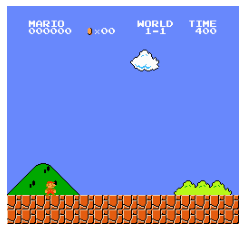

In [8]:
# Showing the effect of using GrayScaleObservation:

# before grayscaling
state1 = env.reset()
print(state1.shape)

# use matplotlib to show the game frame
plt.imshow(state1)
plt.axis(False)
plt.show()

(240, 256, 1)


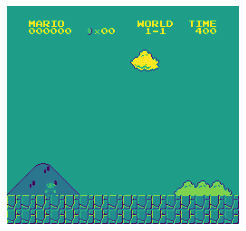

In [19]:
# Showing the effect of using GrayScaleObservation:

# after grayscaling
env = GrayScaleObservation(env, keep_dim=True)
state2 = env.reset()
print(state2.shape)

# use matplotlib to show the game frame
plt.imshow(state2)
plt.axis(False)
plt.show()

(1, 240, 256, 4)


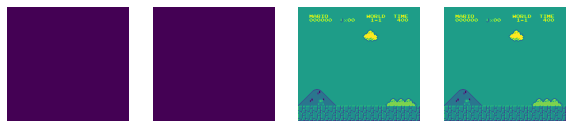

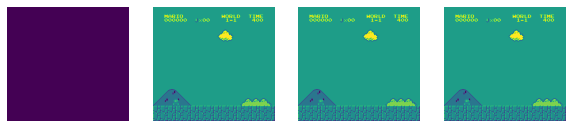

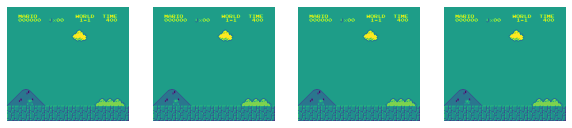

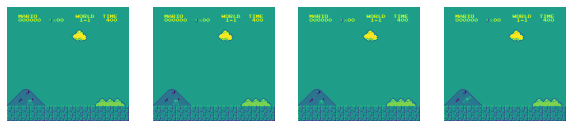

In [7]:
# Showing the effect of frame Stacking using VecFrameStack:

# creating the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# simlifying the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# grayscaling the image
env = GrayScaleObservation(env, keep_dim=True)
# before grayscaling, the state shape is (240, 256, 3), after grayscaling it changes to (240, 256, 1)
# wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# after stacking (the grayscaled frames)
env = VecFrameStack(env, 4, channels_order='last')

# resetting the environment
states = env.reset()
print(states.shape)

# we can stack the frames only after taking atleast 4 steps (with some actions; which in this case is random)
for _ in range(4):
    state, reward, done, info = env.step([env.action_space.sample()])

    # visualize the stacked frames
    plt.figure(figsize=(10,8))
    # this for loop iterates as many times as the no. of stacks
    for idx in range(states.shape[-1]):
        plt.subplot(1,states.shape[-1], idx+1)
        plt.imshow(state[0][:,:,idx])
        plt.axis(False)
    plt.show

(1, 240, 256, 4)


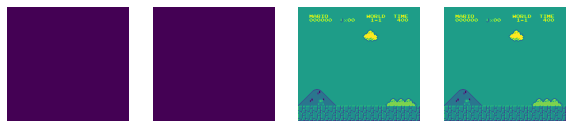

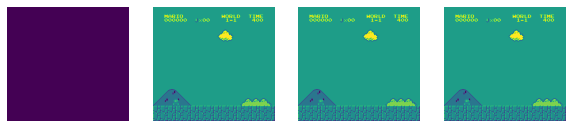

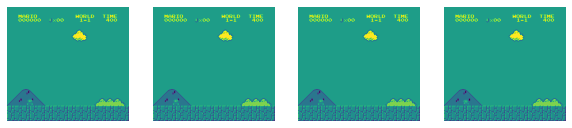

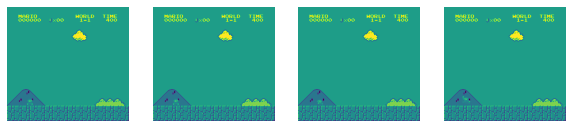

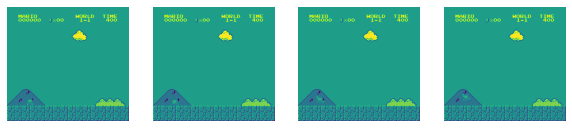

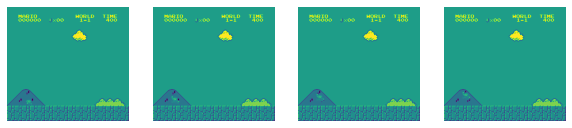

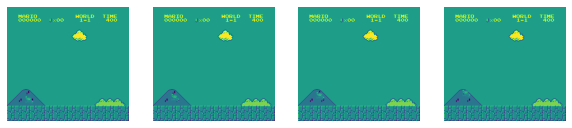

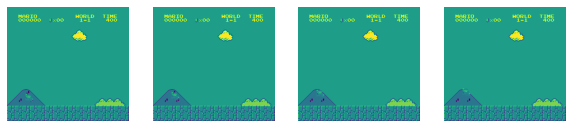

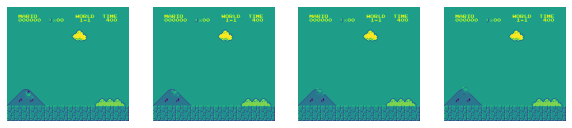

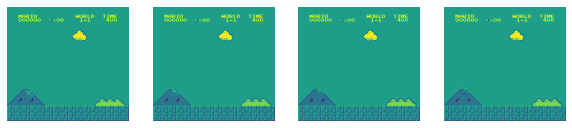

In [8]:
# let's say we want to see mario jump. We use the jump action, which is action no. - 5 or 'A'. We take 10 steps to see the character jump:

# creating the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# simlifying the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# grayscaling the image
env = GrayScaleObservation(env, keep_dim=True)
# before grayscaling, the state shape is (240, 256, 3), after grayscaling it changes to (240, 256, 1)
# wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# after stacking (the grayscaled frames)
env = VecFrameStack(env, 4, channels_order='last')

# resetting the environment
states = env.reset()
print(states.shape)

# we can stack the frames only after taking atleast 4 steps (with some actions; which in this case is jumping or action no. 5 corresponding to simple movement 'A')
# we check for 10 frames to see the character jump
for _ in range(10):
    state, reward, done, info = env.step([env.action_space.sample()])

    # visualize the stacked frames
    plt.figure(figsize=(10,8))
    # this for loop iterates as many times as the no. of stacks
    for idx in range(states.shape[-1]):
        plt.subplot(1,states.shape[-1], idx+1)
        plt.imshow(state[0][:,:,idx])
        plt.axis(False)
    plt.show

We can clearly see the progress in the last frame, as the character jumps, when we are using the jump action.

# 3. Training RL Model

In [4]:
# Training the RL model

# For file path management
import os

# Import PPO: Proximal Policy Optimization; RL Algorithm
from stable_baselines3 import PPO

# Import Base Callbacks for saving the models; periodically
from stable_baselines3.common.callbacks import BaseCallback
# this allows us to save the model (our progress) after a fixed no. of steps

In [4]:
# Setting up and Preprocessing the environment

# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Simlify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# before grayscaling, the state shape is (240, 256, 3), after grayscaling it changes to (240, 256, 1)

# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')
# we are choosing to stack 4 frames together
# we also have to specify where the channel order is: i.e. the last coordinate in the shape tuple of the state shape

In [14]:
# this is the callback class we write; to allow us to save our model after some 'n' no. of steps

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
    
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        
        return True

In [15]:
# setting up the folders
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [16]:
# Setting up model saving callbacks
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
# this callback checks every 100000 steps and saves the best model at the specified path after that

In [17]:
# Setting up the RL Model: PPO
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)
# policy type: Multi-layered Policy; env: Dummy Vectorized Environment; tensorboard_log: logging the results

Using cpu device
Wrapping the env in a VecTransposeImage.


In [18]:
# Training the RL model
model.learn(total_timesteps=50000, callback=callback)
# this saves 50000/10000 = 5 models in the ./train folder

Logging to ./logs/PPO_6
----------------------------
| time/              |     |
|    fps             | 152 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 20            |
|    iterations           | 2             |
|    time_elapsed         | 48            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.7229078e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00473      |
|    learning_rate        | 1e-06         |
|    loss                 | 74.3          |
|    n_updates            | 10            |
|    policy_gradient_loss | 7.69e-05      |
|    value_loss           | 265           |
-------------------------

# 4. Testing RL Model

## Saving and reloading the model

In [20]:
# save the existing trained model
model.save('./saved_models/model-1')

In [21]:
# delete the model to reload it again
del model

In [5]:
# reload the model
model = PPO.load('./saved_models/model-1')

In [ ]:
# restart the game
state = env.reset()

# flag
done = True
# loop through the game
while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

env.close()

This will allow us to see play Super Mario using RL.